**Problem Statement : Build Machine Learning Model to predict house price using Linear Regression.**

### Importing Libraries ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset ###

In [2]:
df=pd.read_csv('boston.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Preprocessing ###

In [8]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.rename(columns={'MEDV':'PRICE'},inplace=True)

### Exploratory Data Analysis ###

<Axes: xlabel='PRICE', ylabel='Density'>

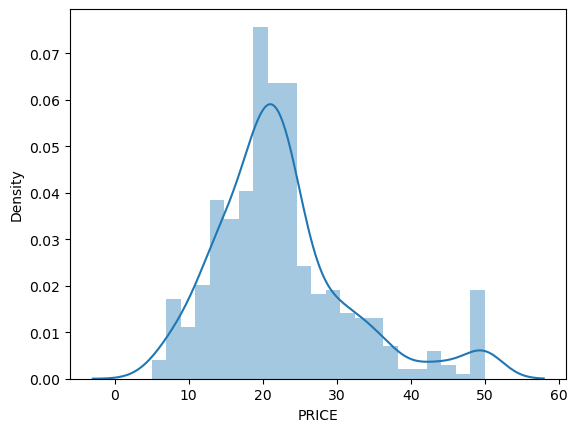

In [10]:
sns.distplot(df['PRICE'])

Text(0, 0.5, 'PRICE')

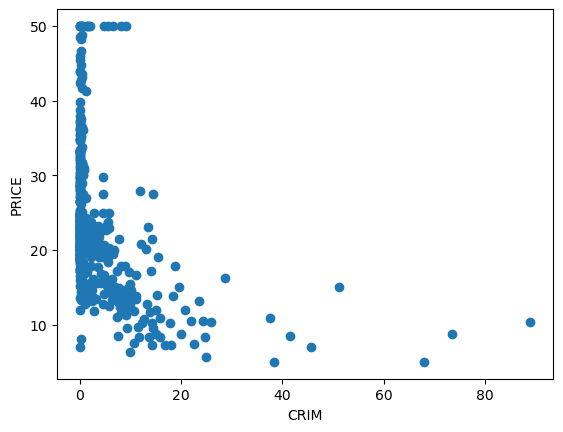

In [11]:
fig,ax=plt.subplots()
ax.scatter(x=df['CRIM'],y=df['PRICE'])
plt.xlabel('CRIM')
plt.ylabel('PRICE')

Text(0, 0.5, 'PRICE')

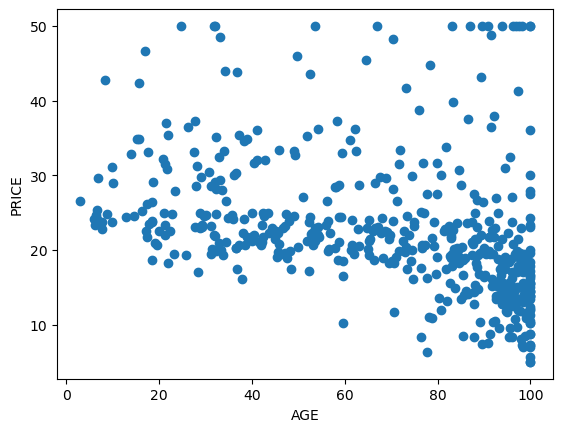

In [12]:
fig,ax=plt.subplots()
ax.scatter(x=df['AGE'],y=df['PRICE'])
plt.xlabel('AGE')
plt.ylabel('PRICE')

Text(0, 0.5, 'Frequency')

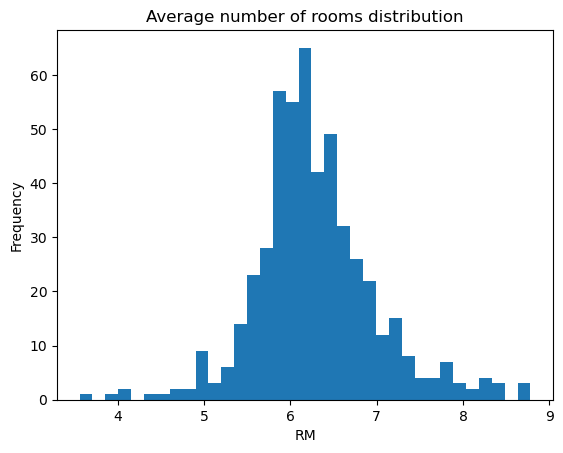

In [13]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(df['RM'],bins=35)
plt.title('Average number of rooms distribution')
plt.xlabel('RM')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

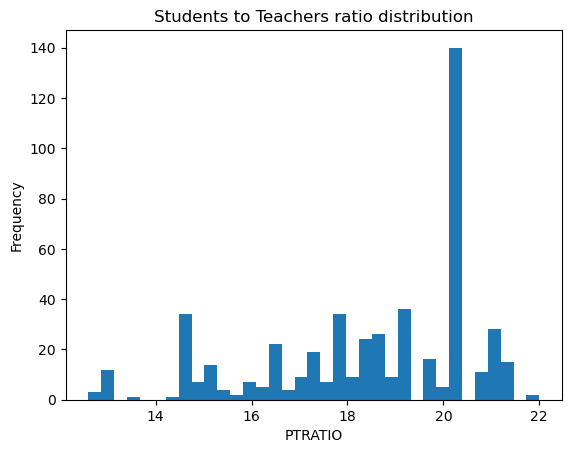

In [14]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(df['PTRATIO'],bins=35)
plt.title('Students to Teachers ratio distribution')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')

### Correlation Matrix ###

In [15]:
corr=df.corr()
corr.shape

(14, 14)

<Axes: >

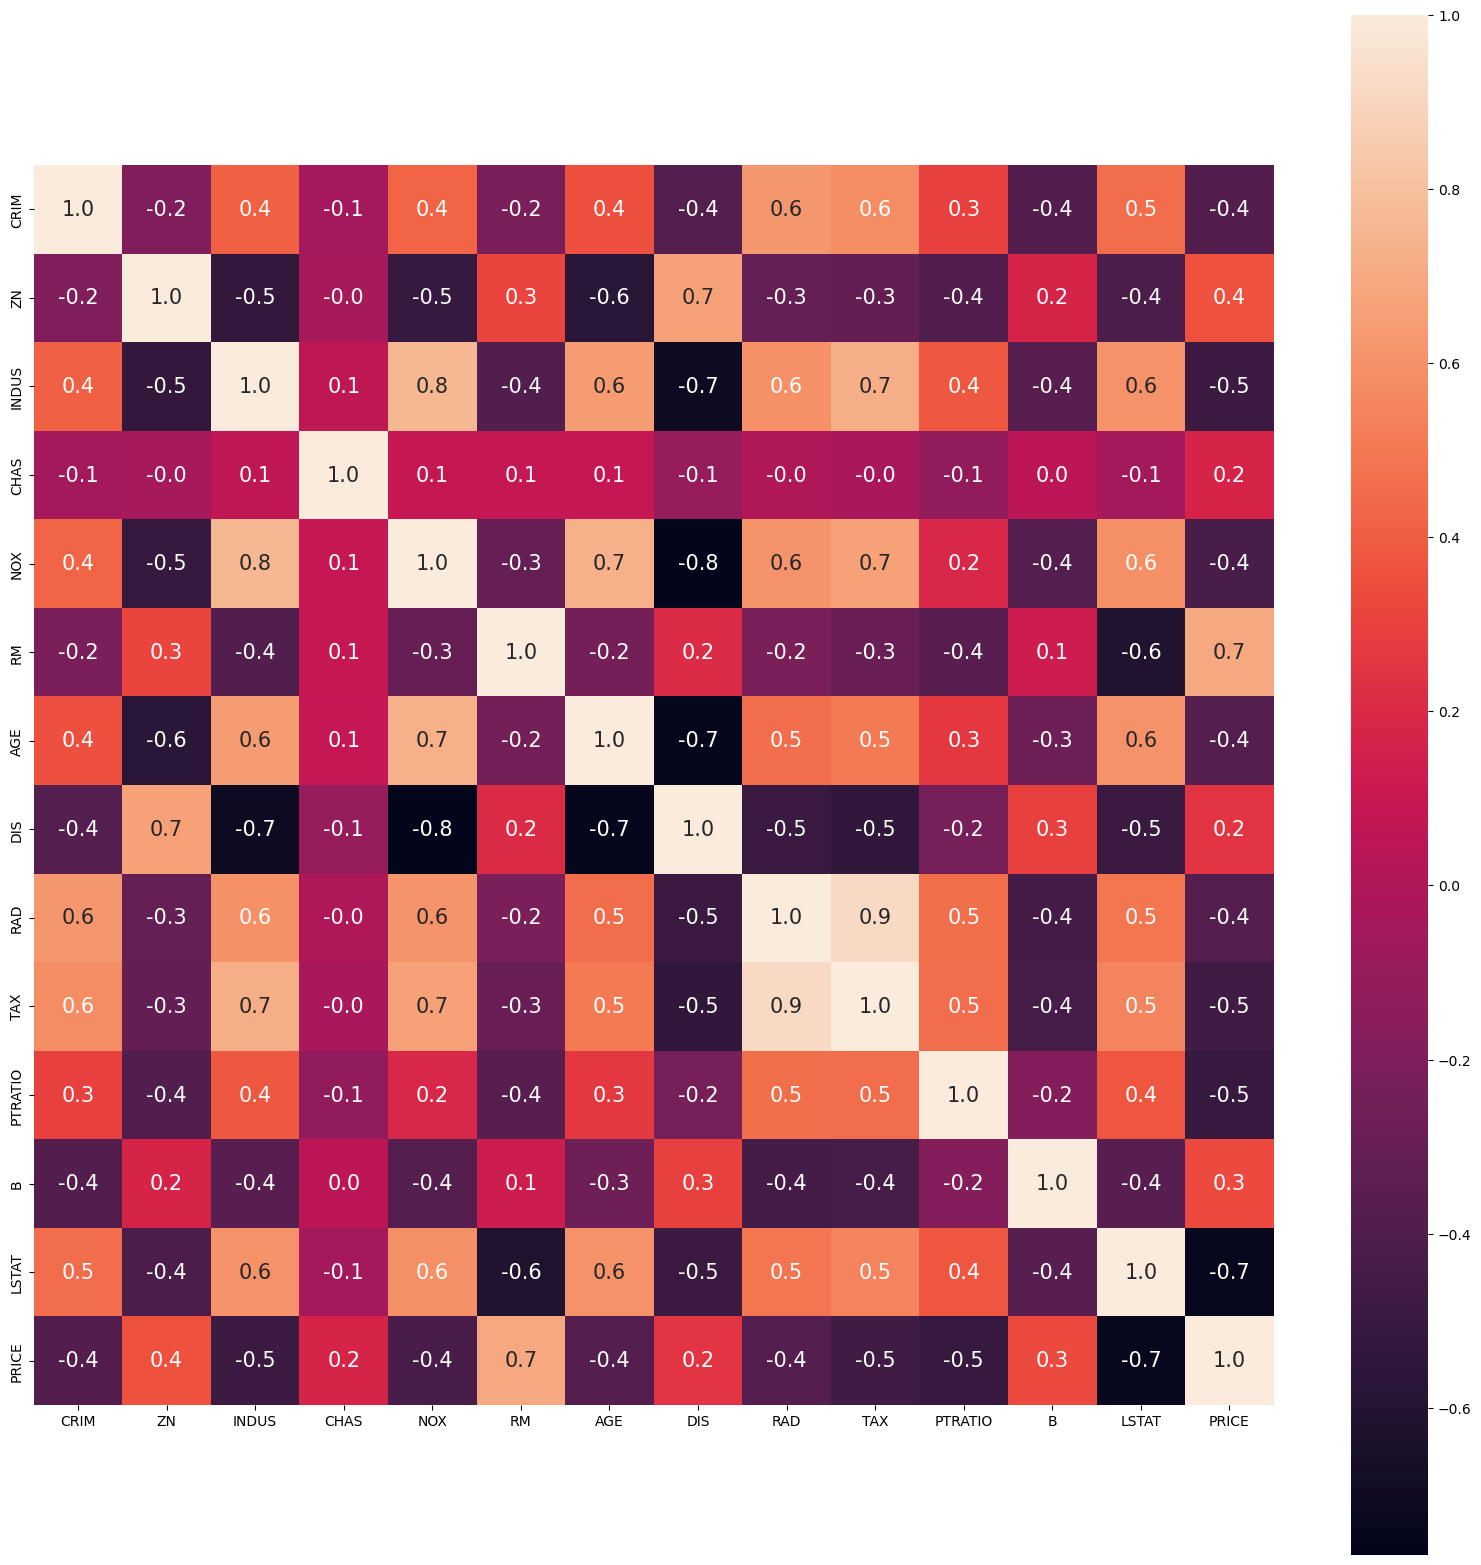

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15})

In [17]:
x=df.iloc[:,:13].values
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [18]:
y=df.iloc[:,-1].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Spliting The Dataset ###

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [20]:
x_train.shape

(354, 13)

In [21]:
x_test.shape

(152, 13)

In [22]:
y_train.shape

(354,)

In [23]:
y_test.shape

(152,)

### Model Training ###

In [24]:
from sklearn.linear_model import LinearRegression
LM=LinearRegression()

In [25]:
LM.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred=LM.predict(x_test)

In [27]:
from sklearn.metrics import r2_score

In [28]:
print("R^2 score:",r2_score(y_test,y_pred))

R^2 score: 0.6733825506400183




---



### Decision Tree ###

In [30]:
from sklearn.tree import DecisionTreeRegressor
reg_tree=DecisionTreeRegressor(random_state=0)
reg_tree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [31]:
pred_tree=reg_tree.predict(x_test)
pred_tree

array([23.7, 50. , 20.3, 11.7, 22.2, 20.4, 21.2, 20.6, 22.7, 14.5, 10.8,
       17.9, 12.6,  8.8, 50. , 35.1, 21.8, 32.7, 28.4, 22.1, 23.1, 22.7,
       18.4, 24.7, 19.4, 16.1, 20.1, 15.6, 39.8, 19.5, 12.6, 14.9, 17.6,
       22.2, 23.9, 19.4,  8.7, 50. , 13.4, 17.9, 22.8, 19.4, 23.7, 14.9,
       24.4, 23.1, 22.4, 19.1, 15.2, 25. , 14.8, 19.8, 20.8, 35.2, 15.6,
       19.8, 19.4, 17.5, 50. , 19.5, 23.4, 23.1, 35.1, 32.4, 14.9, 32.4,
       16.1, 14.4, 15. , 23.2, 17.6, 24.2, 22.5, 33.1, 22. ,  8.8, 37.6,
       23.2, 22. , 21.7, 27.1, 18. , 50. , 37.6, 48.8, 25. , 20.8, 14.2,
       22.9, 19.1, 19.8, 11.8, 20.5, 31.6, 22.2, 20.5, 11.9, 22.9, 19. ,
       18.5, 25. , 19.2, 27.5, 19.4, 31.6, 21.7,  8.3, 19.9, 22.2, 24.5,
       23.6, 17.9, 15.2, 19.1, 14.4, 22.4,  9.5, 18.5, 10.2, 50. , 27.1,
        8.8, 19.8, 21.7, 19.4, 20.5, 36.1, 19.8, 20.5, 36.1, 14.1,  9.5,
       20.5, 16.4, 10.4, 36.1, 20.8, 15.2, 27.1,  8.3, 10.2, 21.7, 23.6,
       24.4, 23.4, 19.4, 37.9, 37.3, 12.8,  8.8, 32

In [32]:
print("R^2 Score :",r2_score(y_test,pred_tree))

R^2 Score : 0.6835179161458892




---







### Random Forest Regressor ###

In [33]:
from sklearn.ensemble import RandomForestRegressor
reg_rfr=RandomForestRegressor(random_state=0,n_estimators=100)
reg_rfr.fit(x_train,y_train)


RandomForestRegressor(random_state=0)

In [34]:
pred_forest=reg_rfr.predict(x_test)
pred_forest

array([23.867, 29.381, 22.052, 10.864, 20.443, 20.832, 21.147, 20.318,
       19.698, 18.227,  8.187, 14.564, 14.719,  9.178, 48.021, 33.775,
       21.115, 34.801, 26.315, 21.209, 23.672, 22.196, 19.291, 24.138,
       20.711, 18.046, 18.771, 15.757, 43.37 , 18.653, 15.02 , 17.473,
       20.158, 20.916, 22.825, 17.139,  8.6  , 29.492, 14.136, 14.72 ,
       22.65 , 20.889, 22.491, 15.935, 23.714, 22.467, 20.535, 16.436,
       14.705, 24.966, 16.239, 20.158, 20.505, 39.652, 15.039, 20.179,
       19.586, 18.583, 23.247, 19.918, 21.634, 21.283, 33.061, 29.661,
       18.855, 27.516, 16.031, 17.767, 17.912, 21.835, 20.188, 22.67 ,
       24.633, 30.946, 28.091,  9.282, 43.047, 21.893, 22.715, 19.506,
       26.811, 17.886, 22.856, 42.659, 42.028, 24.175, 23.319, 14.865,
       25.267, 16.265, 18.689, 13.031, 22.591, 30.288, 21.05 , 22.015,
       11.696, 23.336, 15.094, 18.976, 23.566, 19.98 , 28.457, 20.857,
       28.287, 20.593,  9.258, 18.991, 21.906, 23.103, 33.767, 12.978,
      

In [35]:
print("R^2 Score :",r2_score(y_test,pred_forest))

R^2 Score : 0.8258927744705352
